In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist

In [ ]:
# Loading the dataset

In [6]:
insurance_data = pd.read_csv("Insurance Dataset.csv")
insurance_data.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [7]:
# Normalization function

In [8]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [9]:
df_norm = norm_func(insurance_data)
df_norm.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.359493,0.391695,0.373125,0.108505,0.500000
std,0.250581,0.235384,0.275174,0.140185,0.293045
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.154059,0.186441,0.171875,0.033188,0.250000
50%,0.333026,0.372881,0.275000,0.065587,0.500000
75%,0.467712,0.533898,0.579688,0.129916,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
TWSS = []
k = list(range(2, 7))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[18.56906591852995,
 14.476922604427537,
 10.796791133859635,
 9.05168814427982,
 7.327742148819234]

# Scree Plot or Elbow curve

Text(0, 0.5, 'total_within_SS')

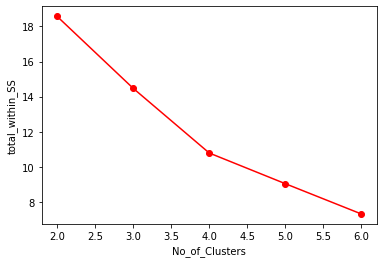

In [11]:
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

## Threfore, optimal number of clusters = 4

In [12]:
model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

# getting the labels of clusters assigned to each row

In [13]:
model.labels_

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2])

# converting numpy array into pandas series object

In [14]:
mb = pd.Series(model.labels_)

# creating a  new column and assigning it to new column

In [15]:
insurance_data['clust'] = mb

In [16]:
insurance_data.head()
df_norm.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.019569,0.000000
1,0.005535,0.067797,0.403125,0.003236,0.010101
2,0.011070,0.084746,0.446875,0.006001,0.020202
3,0.016605,0.118644,0.200000,0.000000,0.030303
4,0.022140,0.152542,0.171875,0.000316,0.040404


In [17]:
insurance_data = insurance_data.iloc[:,[5,0,1,2,3,4]]
insurance_data.head()

,clust,Premiums Paid,Age,Days to Renew,Claims made,Income
0,3,2800,26,233,3890.076336,28000
1,0,2950,27,130,2294.444444,29500
2,0,3100,28,144,2564.545455,31000
3,0,3250,30,65,1978.260870,32500
4,0,3400,32,56,2009.090909,34000


In [18]:
insurance_data.iloc[:, 1:6].groupby(insurance_data.clust).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,5913.000000,37.120000,60.720000,3541.481735,54100.000000
1,13334.459459,44.351351,74.000000,8562.445973,120432.432432
2,23973.611111,61.944444,164.222222,28517.724814,158083.333333
3,9075.000000,46.350000,241.400000,16961.637282,78550.000000


In [19]:
insurance_data.to_csv("Kmeans_insurance.csv", encoding = "utf-8")

In [20]:
import os
os.getcwd()

'C:\\Users\\DELL\\K Means'